## Homework #4 - Logistic Regression

### Overview:
In the previous topic, you learned about regression tasks in the Machine
Learning field. Classification is another popular type of task in Machine
Learning, where instead of learning to predict a continuous value, you
learn to predict the discrete ones. The first type of classification model
that you will learn will be the LogisticRegression, which uses linear
regression as a base model and adapts it to classification tasks.
In this task, we invite you to train 2 models on chosen Data Set that
should predict the class column. The models are the following:
* the LogisticRegression from sklearn.
* the Log reg implementation offered in SMLH. ( Sigmoid Machine Learning Handbook)

### Tasks:
* In this task, we invite you to train 2 models on the selected Data Set
that should predict the target column. The models are the following:
  * the LinearRegression from sklearn.
  * the Lin reg implementation offered in SMLH.

The tasks:
* Create a Jupyter notebook with a clean code.
* If your classes are expressed as non-numerical features, map them
to numbers, for example, 0, 1, 2, etc.
* Study the correlation between features, find the features subset with
the highest correlation with the target column, and try to explain from
the business point of view why they have such a big correlation.
* Create a second set of data with the columns that have an absolute
correlation between 0.5 and 0.8 with the target column.
* Split the data into 2 sub-sets using the train test split function from
sklearn.
* Train a sklearn Logistic Regression model on the data provided to
you.
* Train a from-scratch implementation of Logistic Regression on the
train sub-set.
* Test the models on the test sets from the initial data set. For error,
metric use the accuracy score function from sklearn.metrics.
* Split the data with the selected columns into 2 sub-sets using the
train test split function from sklearn.
* Train a sklearn Logistic Regression model on the data with selected
columns (train subset).
* Train a from-scratch implementation of Logistic Regression on the
train sub-set.
* Test the models on the test sets from the initial data set. For error,
metric use the accuracy score function from sklearn.metrics.
* Please try to interpret the results you are getting by comparing the
model’s accuracy on the test sets.
* Please comment on your code.

In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

Read the data about Titanic Survivors. I'll stick to that dataset, since I analyzed it previously, and I am interested in actually training a model on the data I have and check if
the data I selected will yield good results.

In [125]:
dataset = pd.read_csv("dataset/titanic_train.csv")

In [126]:
dataset.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [127]:
dataset.tail(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Figure size 1000x500 with 0 Axes>

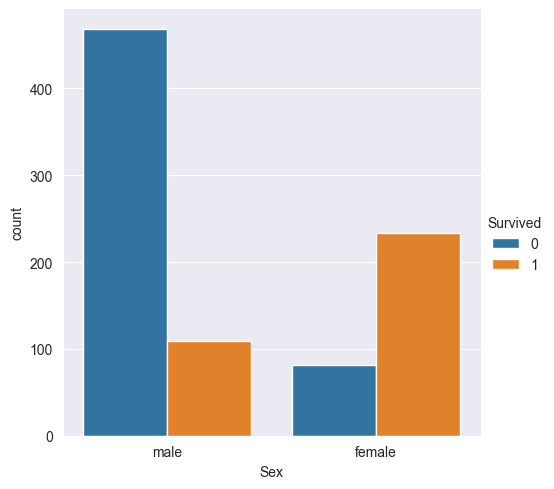

In [130]:
plt.figure(figsize=(10, 5))
sns.catplot(data=dataset, x="Sex", hue="Survived", kind="count")
plt.show()

In [131]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset.drop(['PassengerId', 'Ticket', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,male,22.0,7.2500,NaN,S,2
1,1,1,female,38.0,71.2833,C85,C,2
2,1,3,female,26.0,7.9250,NaN,S,1
3,1,1,female,35.0,53.1000,C123,S,2
4,0,3,male,35.0,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,NaN,S,1
887,1,1,female,19.0,30.0000,B42,S,1
888,0,3,female,NaN,23.4500,NaN,S,4
889,1,1,male,26.0,30.0000,C148,C,1


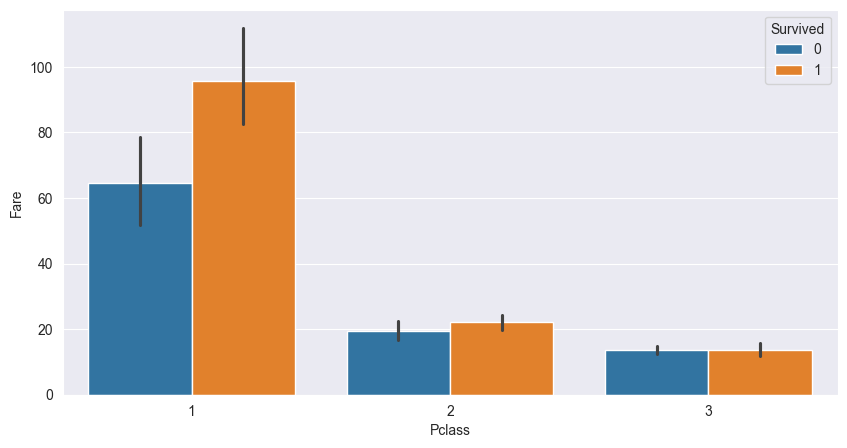

In [132]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dataset, x="Pclass", y="Fare", hue="Survived")
plt.show()

In [133]:
dataset["Cabin"] = dataset["Cabin"].str[0].fillna("X")
dataset.rename(columns={"Cabin": "Deck"}, inplace=True)
dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
0,0,3,male,22.0,7.2500,X,S,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,X,S,1
3,1,1,female,35.0,53.1000,C,S,2
4,0,3,male,35.0,8.0500,X,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,X,S,1
887,1,1,female,19.0,30.0000,B,S,1
888,0,3,female,NaN,23.4500,X,S,4
889,1,1,male,26.0,30.0000,C,C,1


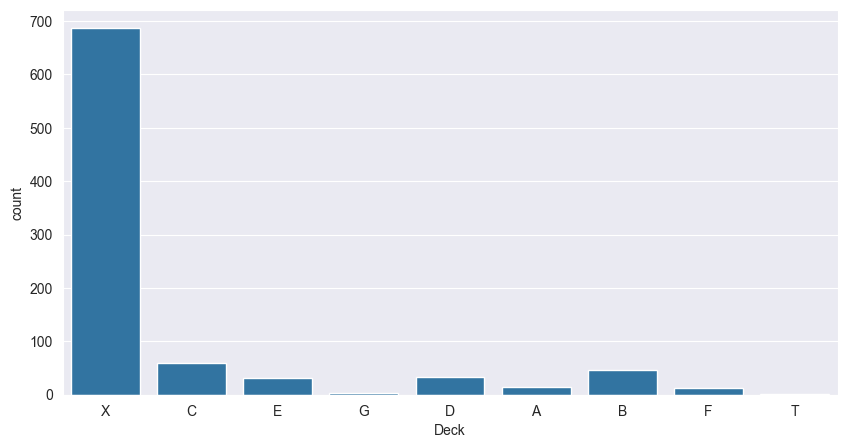

In [134]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='Deck')
plt.show()

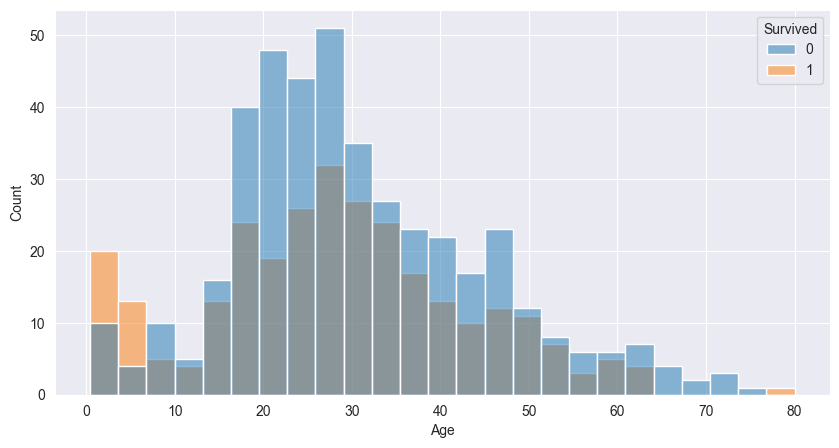

In [135]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset, x="Age", bins=25, hue="Survived")
# sns.histplot(data=dataset, x="Age", bins=25, hue="Survived", stat='proportion', multiple="fill")
plt.show()

In [136]:
dataset["Sex"] = dataset["Sex"].map({"female": 0, "male": 1})
dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
0,0,3,1,22.0,7.2500,X,S,2
1,1,1,0,38.0,71.2833,C,C,2
2,1,3,0,26.0,7.9250,X,S,1
3,1,1,0,35.0,53.1000,C,S,2
4,0,3,1,35.0,8.0500,X,S,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,X,S,1
887,1,1,0,19.0,30.0000,B,S,1
888,0,3,0,NaN,23.4500,X,S,4
889,1,1,1,26.0,30.0000,C,C,1


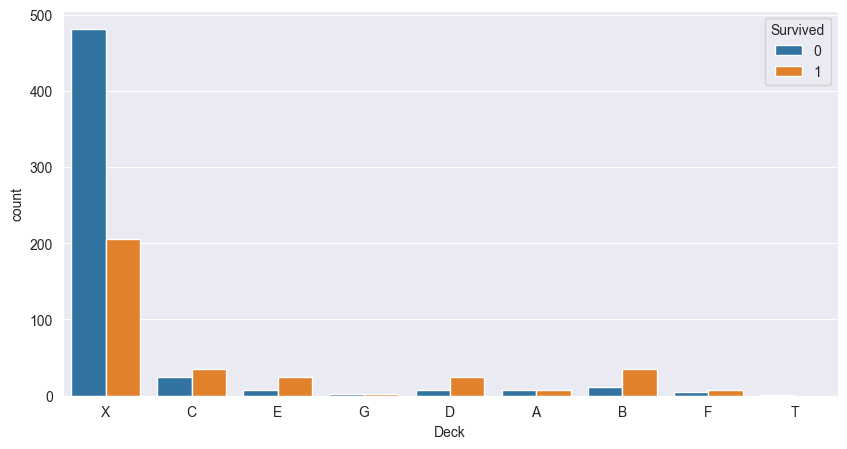

In [137]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x="Deck", hue='Survived')
plt.show()

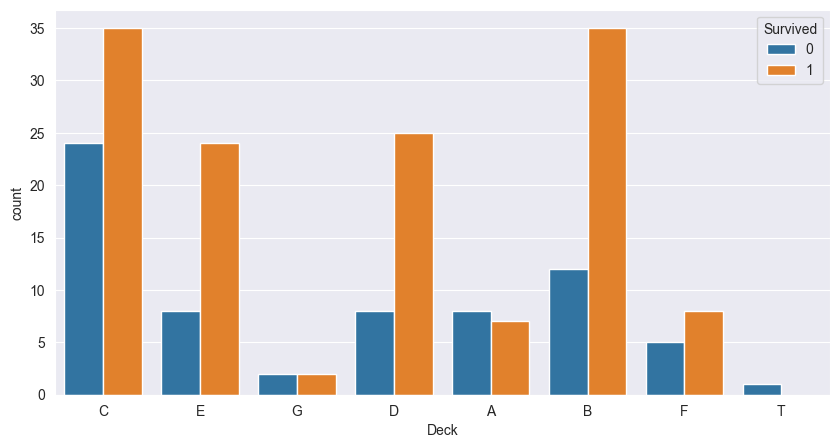

In [138]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset[dataset.Deck != "X"], x="Deck", hue='Survived')
plt.show()

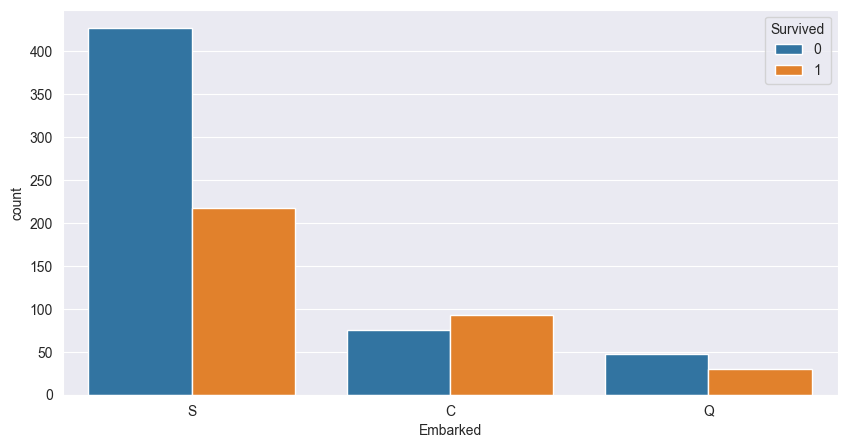

In [139]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x="Embarked", hue='Survived')
plt.show()

In [140]:
dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
0,0,3,1,22.0,7.2500,X,S,2
1,1,1,0,38.0,71.2833,C,C,2
2,1,3,0,26.0,7.9250,X,S,1
3,1,1,0,35.0,53.1000,C,S,2
4,0,3,1,35.0,8.0500,X,S,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,X,S,1
887,1,1,0,19.0,30.0000,B,S,1
888,0,3,0,NaN,23.4500,X,S,4
889,1,1,1,26.0,30.0000,C,C,1


In [141]:
X_features = dataset.drop('Survived', axis=1)
y_target = dataset['Survived']
X_features, y_target

(     Pclass  Sex   Age     Fare Deck Embarked  FamilySize
 0         3    1  22.0   7.2500    X        S           2
 1         1    0  38.0  71.2833    C        C           2
 2         3    0  26.0   7.9250    X        S           1
 3         1    0  35.0  53.1000    C        S           2
 4         3    1  35.0   8.0500    X        S           1
 ..      ...  ...   ...      ...  ...      ...         ...
 886       2    1  27.0  13.0000    X        S           1
 887       1    0  19.0  30.0000    B        S           1
 888       3    0   NaN  23.4500    X        S           4
 889       1    1  26.0  30.0000    C        C           1
 890       3    1  32.0   7.7500    X        Q           1
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [142]:
train_dataset, test_dataset = train_test_split(dataset, test_size=.2, random_state=1)

In [143]:
train_dataset["Age"] = train_dataset["Age"].fillna(train_dataset['Age'].median())
train_dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
301,1,3,1,29.0,23.2500,X,Q,3
309,1,1,0,30.0,56.9292,E,C,1
516,1,2,0,34.0,10.5000,F,S,1
120,0,2,1,21.0,73.5000,X,S,3
570,1,2,1,62.0,10.5000,X,S,1
...,...,...,...,...,...,...,...,...
715,0,3,1,19.0,7.6500,F,S,1
767,0,3,0,30.5,7.7500,X,Q,1
72,0,2,1,21.0,73.5000,X,S,1
235,0,3,0,29.0,7.5500,X,S,1


In [144]:
train_dataset['Embarked'] = train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0])
train_dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
301,1,3,1,29.0,23.2500,X,Q,3
309,1,1,0,30.0,56.9292,E,C,1
516,1,2,0,34.0,10.5000,F,S,1
120,0,2,1,21.0,73.5000,X,S,3
570,1,2,1,62.0,10.5000,X,S,1
...,...,...,...,...,...,...,...,...
715,0,3,1,19.0,7.6500,F,S,1
767,0,3,0,30.5,7.7500,X,Q,1
72,0,2,1,21.0,73.5000,X,S,1
235,0,3,0,29.0,7.5500,X,S,1


In [145]:
deck_survival_train = train_dataset.groupby('Deck')['Survived'].mean().reset_index()
deck_survival_train_sorted = deck_survival_train.sort_values(by='Survived', ascending=True)
deck_survival_train_sorted['Rank'] = deck_survival_train_sorted['Survived'].rank(method='min')
deck_survival_train_sorted

,Deck,Survived,Rank
7,T,0.000000,1.0
8,X,0.287020,2.0
0,A,0.384615,3.0
2,C,0.588235,4.0
6,G,0.666667,5.0
5,F,0.666667,5.0
3,D,0.769231,7.0
1,B,0.771429,8.0
4,E,0.833333,9.0


In [146]:
deck_rank_train_mapping = dict(zip(deck_survival_train_sorted['Deck'], deck_survival_train_sorted['Rank']))
deck_rank_train_mapping

{'T': 1.0,
 'X': 2.0,
 'A': 3.0,
 'C': 4.0,
 'G': 5.0,
 'F': 5.0,
 'D': 7.0,
 'B': 8.0,
 'E': 9.0}

In [147]:
train_dataset["Deck"] = train_dataset['Deck'].map(deck_rank_train_mapping)
train_dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
301,1,3,1,29.0,23.2500,2.0,Q,3
309,1,1,0,30.0,56.9292,9.0,C,1
516,1,2,0,34.0,10.5000,5.0,S,1
120,0,2,1,21.0,73.5000,2.0,S,3
570,1,2,1,62.0,10.5000,2.0,S,1
...,...,...,...,...,...,...,...,...
715,0,3,1,19.0,7.6500,5.0,S,1
767,0,3,0,30.5,7.7500,2.0,Q,1
72,0,2,1,21.0,73.5000,2.0,S,1
235,0,3,0,29.0,7.5500,2.0,S,1


In [148]:
embarked_survival_train = train_dataset.groupby('Embarked')['Survived'].mean().reset_index()
embarked_survival_train_sorted = embarked_survival_train.sort_values(by='Survived', ascending=True)
embarked_survival_train_sorted['Rank'] = embarked_survival_train_sorted['Survived'].rank(method='min')
embarked_survival_train_sorted

,Embarked,Survived,Rank
2,S,0.332039,1.0
1,Q,0.390625,2.0
0,C,0.548872,3.0


In [149]:
embarked_rank_train_mapping = dict(zip(embarked_survival_train_sorted['Embarked'], embarked_survival_train_sorted['Rank']))
embarked_rank_train_mapping

{'S': 1.0, 'Q': 2.0, 'C': 3.0}

In [150]:
train_dataset["Embarked"] = train_dataset['Embarked'].map(embarked_rank_train_mapping)
train_dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
301,1,3,1,29.0,23.2500,2.0,2.0,3
309,1,1,0,30.0,56.9292,9.0,3.0,1
516,1,2,0,34.0,10.5000,5.0,1.0,1
120,0,2,1,21.0,73.5000,2.0,1.0,3
570,1,2,1,62.0,10.5000,2.0,1.0,1
...,...,...,...,...,...,...,...,...
715,0,3,1,19.0,7.6500,5.0,1.0,1
767,0,3,0,30.5,7.7500,2.0,2.0,1
72,0,2,1,21.0,73.5000,2.0,1.0,1
235,0,3,0,29.0,7.5500,2.0,1.0,1


In [151]:
print(train_dataset.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Deck          0
Embarked      0
FamilySize    0
dtype: int64


In [152]:
test_dataset["Age"] = test_dataset["Age"].fillna(test_dataset['Age'].median())
test_dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
862,1,1,0,48.0,25.9292,D,S,1
223,0,3,1,27.0,7.8958,X,S,1
84,1,2,0,17.0,10.5000,X,S,1
680,0,3,0,27.0,8.1375,X,Q,1
535,1,2,0,7.0,26.2500,X,S,3
...,...,...,...,...,...,...,...,...
796,1,1,0,49.0,25.9292,D,S,1
815,0,1,1,27.0,0.0000,B,S,1
629,0,3,1,27.0,7.7333,X,Q,1
421,0,3,1,21.0,7.7333,X,Q,1


In [153]:
test_dataset['Embarked'] = test_dataset['Embarked'].fillna(test_dataset['Embarked'].mode()[0])
test_dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
862,1,1,0,48.0,25.9292,D,S,1
223,0,3,1,27.0,7.8958,X,S,1
84,1,2,0,17.0,10.5000,X,S,1
680,0,3,0,27.0,8.1375,X,Q,1
535,1,2,0,7.0,26.2500,X,S,3
...,...,...,...,...,...,...,...,...
796,1,1,0,49.0,25.9292,D,S,1
815,0,1,1,27.0,0.0000,B,S,1
629,0,3,1,27.0,7.7333,X,Q,1
421,0,3,1,21.0,7.7333,X,Q,1


In [154]:
print(test_dataset.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Deck          0
Embarked      0
FamilySize    0
dtype: int64


In [155]:
deck_survival_test = test_dataset.groupby('Deck')['Survived'].mean().reset_index()
deck_survival_test_sorted = deck_survival_test.sort_values(by='Survived', ascending=True)
deck_survival_test_sorted['Rank'] = deck_survival_test_sorted['Survived'].rank(method='min')
deck_survival_test_sorted

,Deck,Survived,Rank
6,G,0.000000,1.0
5,F,0.000000,1.0
7,X,0.350000,3.0
4,E,0.500000,4.0
2,C,0.625000,5.0
1,B,0.666667,6.0
3,D,0.714286,7.0
0,A,1.000000,8.0


In [156]:
deck_rank_test_mapping = dict(zip(deck_survival_test_sorted['Deck'], deck_survival_test_sorted['Rank']))
deck_rank_test_mapping

{'G': 1.0,
 'F': 1.0,
 'X': 3.0,
 'E': 4.0,
 'C': 5.0,
 'B': 6.0,
 'D': 7.0,
 'A': 8.0}

In [157]:
test_dataset["Deck"] = test_dataset['Deck'].map(deck_rank_test_mapping)
test_dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
862,1,1,0,48.0,25.9292,7.0,S,1
223,0,3,1,27.0,7.8958,3.0,S,1
84,1,2,0,17.0,10.5000,3.0,S,1
680,0,3,0,27.0,8.1375,3.0,Q,1
535,1,2,0,7.0,26.2500,3.0,S,3
...,...,...,...,...,...,...,...,...
796,1,1,0,49.0,25.9292,7.0,S,1
815,0,1,1,27.0,0.0000,6.0,S,1
629,0,3,1,27.0,7.7333,3.0,Q,1
421,0,3,1,21.0,7.7333,3.0,Q,1


In [158]:
embarked_survival_test = test_dataset.groupby('Embarked')['Survived'].mean().reset_index()
embarked_survival_test_sorted = embarked_survival_test.sort_values(by='Survived', ascending=True)
embarked_survival_test_sorted['Rank'] = embarked_survival_test_sorted['Survived'].rank(method='min')
embarked_survival_test_sorted

,Embarked,Survived,Rank
2,S,0.366412,1.0
1,Q,0.384615,2.0
0,C,0.571429,3.0


In [159]:
embarked_rank_test_mapping = dict(zip(embarked_survival_test_sorted['Embarked'], embarked_survival_test_sorted['Rank']))
embarked_rank_test_mapping

{'S': 1.0, 'Q': 2.0, 'C': 3.0}

In [160]:
test_dataset["Embarked"] = test_dataset['Embarked'].map(embarked_rank_test_mapping)
test_dataset

,Survived,Pclass,Sex,Age,Fare,Deck,Embarked,FamilySize
862,1,1,0,48.0,25.9292,7.0,1.0,1
223,0,3,1,27.0,7.8958,3.0,1.0,1
84,1,2,0,17.0,10.5000,3.0,1.0,1
680,0,3,0,27.0,8.1375,3.0,2.0,1
535,1,2,0,7.0,26.2500,3.0,1.0,3
...,...,...,...,...,...,...,...,...
796,1,1,0,49.0,25.9292,7.0,1.0,1
815,0,1,1,27.0,0.0000,6.0,1.0,1
629,0,3,1,27.0,7.7333,3.0,2.0,1
421,0,3,1,21.0,7.7333,3.0,2.0,1


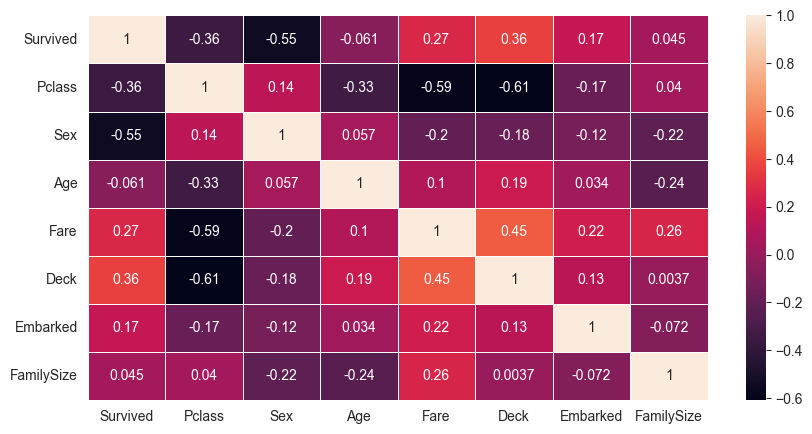

In [161]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_dataset.corr(), annot=True, linewidths=0.5, cbar=True)
plt.show()

In [162]:
train_dataset.corr()['Survived'].abs().sort_values(ascending=False)

Survived      1.000000
Sex           0.546254
Deck          0.356990
Pclass        0.356366
Fare          0.269928
Embarked      0.170111
Age           0.060782
FamilySize    0.044812
Name: Survived, dtype: float64

### SMLH Implementation

In [163]:
import math
class LogisticRegressionCustom:
    def __init__(self, learning_rate: float = 0.05, max_iters: int = 10000):
        self.__learning_rate = learning_rate
        self.__max_iters = max_iters
        self.__weights = None
        self.__bias = None

    def __sigmoid_function(self, z: 'np.array') -> 'np.array':
        return 1 / (1 + np.exp(-z))

    def __gradient_descent(self, X: 'np.array', y: 'np.array') -> None:
        # An array to store cost J and w's at each iteration primarily for graphing later
        J_history = []
        w_history = []
        num_examples = X.shape[0]
        for i in range(self.__max_iters):
            # Compute logits (z = X * w + b)
            linear_function_values = np.dot(X, self.__weights) + self.__bias
            z = linear_function_values
            prediction = self.__sigmoid_function(z)

            # Numerically stable log loss
            loss = np.maximum(prediction, 0) - prediction * y + np.log(1 + np.exp(-np.abs(prediction)))
            total_cost = np.sum(loss) / num_examples

            dj_dw = (1 / num_examples) * np.dot((prediction - y), X)
            dj_db = (1 / num_examples) * np.sum(prediction - y)

            self.__weights -= self.__learning_rate * dj_dw
            self.__bias -= self.__learning_rate * dj_db

            # Save cost J at each iteration
            if i<10000:      # prevent resource exhaustion
                J_history.append(total_cost)

            # Print cost every at intervals 10 times or as many iterations if < 10
            if i% math.ceil(self.__max_iters/10) == 0 or i == (self.__max_iters-1):
                w_history.append(self.__weights)
                print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")


    def fit(self, X: 'np.array', y: 'np.array'):
        self.__weights = np.zeros(X.shape[1])
        self.__bias = .0

        self.__gradient_descent(X, y)

        return self

    def __predict_probabilities(self, X: 'np.array') -> 'np.array':
        linear_function_values = np.dot(X, self.__weights) + self.__bias
        return self.__sigmoid_function(linear_function_values)

    def predict(self, X: 'np.array') -> 'np.array':
        return (self.__predict_probabilities(X) > 0.5).astype(int)


In [164]:
model_custom = LogisticRegressionCustom()
model_custom.fit(X=train_dataset.loc[:, ['Age', 'Fare', 'Pclass', 'FamilySize', 'Sex', 'Embarked', 'Deck']], y=train_dataset['Survived'])

Iteration    0: Cost     0.79   
Iteration 1000: Cost     0.67   
Iteration 2000: Cost     0.67   
Iteration 3000: Cost     0.67   
Iteration 4000: Cost     0.68   
Iteration 5000: Cost     0.67   
Iteration 6000: Cost     0.69   
Iteration 7000: Cost     0.69   
Iteration 8000: Cost     0.74   
Iteration 9000: Cost     0.74   
Iteration 9999: Cost     0.64   


In [165]:
y_pred_custom = model_custom.predict(X=test_dataset.loc[:, ['Age', 'Fare', 'Pclass', 'FamilySize', 'Sex', 'Embarked', 'Deck']])
y_pred_custom

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1])

In [166]:
y_hat = test_dataset['Survived'].to_numpy()
y_hat

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [167]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_pred_custom)

0.7988826815642458

### Scikit-learn Implementation

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
model = LogisticRegression()
model.fit(X=train_dataset.loc[:, ['Age', 'Fare', 'Pclass', 'FamilySize', 'Sex', 'Deck', 'Embarked']], y=train_dataset['Survived'])

LogisticRegression()

In [170]:
y_pred = model.predict(X=test_dataset.loc[:, ['Age', 'Fare', 'Pclass', 'FamilySize', 'Sex', 'Deck', 'Embarked']])
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1])

In [171]:
test_dataset['Survived'].to_numpy()

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset['Survived'].to_numpy(), y_pred)

0.8044692737430168

In [173]:
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
print(f1_score(test_dataset['Survived'].to_numpy(), y_pred_custom), f1_score(test_dataset['Survived'].to_numpy(), y_pred))
print(precision_score(test_dataset['Survived'].to_numpy(), y_pred_custom), f1_score(test_dataset['Survived'].to_numpy(), y_pred))
print(recall_score(test_dataset['Survived'].to_numpy(), y_pred_custom), f1_score(test_dataset['Survived'].to_numpy(), y_pred))


0.7692307692307693 0.7619047619047619
0.7228915662650602 0.7619047619047619
0.821917808219178 0.7619047619047619


### Scikit-learn Implementation on Subset of Dataset

In [174]:
model = LogisticRegression()
model.fit(X=train_dataset.loc[:, ['Pclass', 'Sex', 'Deck']], y=train_dataset['Survived'])

LogisticRegression()

In [175]:
y_pred = model.predict(X=test_dataset.loc[:, ['Pclass', 'Sex', 'Deck']])
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1])

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset['Survived'].to_numpy(), y_pred)

0.7653631284916201

### SMLH Implementation on Subset of Dataset

In [177]:
model_custom = LogisticRegressionCustom()
model_custom.fit(X=train_dataset.loc[:, ['Pclass', 'Sex']], y=train_dataset['Survived'])

Iteration    0: Cost     0.79   
Iteration 1000: Cost     0.69   
Iteration 2000: Cost     0.68   
Iteration 3000: Cost     0.68   
Iteration 4000: Cost     0.68   
Iteration 5000: Cost     0.68   
Iteration 6000: Cost     0.68   
Iteration 7000: Cost     0.68   
Iteration 8000: Cost     0.68   
Iteration 9000: Cost     0.68   
Iteration 9999: Cost     0.68   


In [178]:
y_pred_custom = model_custom.predict(X=test_dataset.loc[:, ['Pclass', 'Sex']])
y_pred_custom

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1])

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset['Survived'].to_numpy(), y_pred_custom)

0.776536312849162

In [180]:
dataset.shape

(891, 8)

In [181]:
test_dataset.shape

(179, 8)

In [182]:
train_dataset.shape

(712, 8)

In [183]:
train_dataset["Survived"].value_counts(normalize=True)

Survived
0    0.622191
1    0.377809
Name: proportion, dtype: float64

In [184]:
test_dataset["Survived"].value_counts(normalize=True)

Survived
0    0.592179
1    0.407821
Name: proportion, dtype: float64

In [185]:
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
print(f1_score(test_dataset['Survived'].to_numpy(), y_pred_custom), f1_score(test_dataset['Survived'].to_numpy(), y_pred))
print(precision_score(test_dataset['Survived'].to_numpy(), y_pred_custom), f1_score(test_dataset['Survived'].to_numpy(), y_pred))
print(recall_score(test_dataset['Survived'].to_numpy(), y_pred_custom), f1_score(test_dataset['Survived'].to_numpy(), y_pred))


0.7101449275362319 0.7162162162162162
0.7538461538461538 0.7162162162162162
0.6712328767123288 0.7162162162162162
